In [2]:
import psycopg2 as ppg
import pandas as pd
import numpy as np
import random
import datetime
import time

%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
usa = (-125.6791025,25.4180700649,-66.885417,
                           49.3284551525)
la = ( -119.578941, 32.799580, -114.130814, 35.809120)
    
def in_place(pt, box, long_field='long', lat_field='lat'):
    return (pt[long_field] > box[0]) & \
             (pt[lat_field] > box[1]) & \
             (pt[long_field] < box[2]) & \
             (pt[lat_field] < box[3])

In [4]:
con = ppg.connect(dbname="tweets", user="patrick")
con.rollback()
with con.cursor() as cur:
    cur.execute("select user_id, friends_count, followers_count, created_at, "
                "(last_tweet_at < '2015-05-15') as churn FROM users")
    user_df = pd.DataFrame(cur.fetchall(), columns=[c[0] for c in cur.description])
query_date = pd.to_datetime(datetime.datetime.strptime("2015-06-17", "%Y-%m-%d"))

In [5]:
user_df['user_age'] = (query_date - user_df.created_at).astype(np.int64)
(query_date - user_df.created_at)[0].days

2100

In [6]:
user_df.columns

Index([u'user_id', u'friends_count', u'followers_count', u'created_at', u'churn', u'user_age'], dtype='object')

In [7]:
with con.cursor() as cur:
    cur.execute("select tweet_id, lat, long from tweets")
    tweet_loc_df = pd.DataFrame(cur.fetchall(), columns=[c[0] for c in cur.description])
tweet_loc_df['in_us'] = tweet_loc_df.apply(lambda x: in_place(x, usa), axis=1)

In [8]:
my_pts = tweet_loc_df[tweet_loc_df.in_us][['long','lat']]

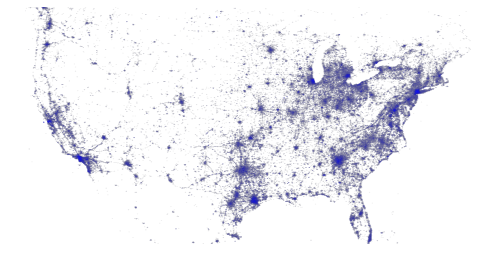

In [9]:
from matplotlib.colors import LinearSegmentedColormap

cdict1 = {'red':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (0.5, 0.5, 0.5),
                   (1.0, 1.0, 1.0)),
          
          'alpha': ((0.0, 0.0, 0.0),
                   (0.5, 0.5, 0.5),
                   (1.0, 1.0, 1.0))
        }
blue_alpha = LinearSegmentedColormap('BlueAlpha1', cdict1)

plt.hexbin(x=my_pts.long, y=my_pts.lat,bins='log', cmap=blue_alpha, gridsize=400)
plt.gca().set_aspect(69./53.)
plt.grid(b=False)
plt.axis('off')
plt.savefig("../app/static/map_tweets_all.png", dpi=300, transparent=True)

In [10]:
#from scipy.stats import gaussian_kde

#densities = gaussian_kde(tweet_loc_df.loc[random_integers(0,tweet_loc_df.index.shape[0],200),['long','lat']].values.T)

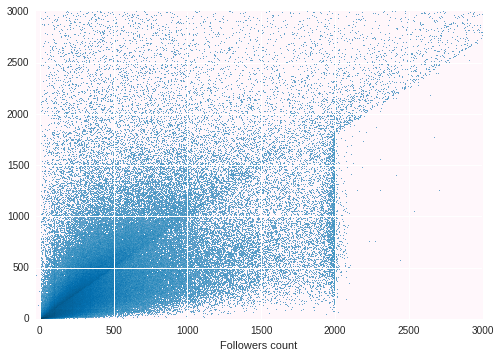

In [26]:
normal_users=user_df[(user_df.friends_count < 3000) & (user_df.followers_count < 3000)]
hist_obj=plt.hist2d(x=normal_users.friends_count, y=normal_users.followers_count, 
           cmap=plt.cm.PuBu,
           norm=matplotlib.colors.PowerNorm(0.1), 
           bins=500)

plt.xlabel("Friends count")
plt.xlabel("Followers count")

In [38]:
normal_users = normal_users[normal_users.churn.notnull()]
(normal_users[normal_users.churn==True])

,user_id,friends_count,followers_count,created_at,churn,user_age
18,333660066,81,38,2011-07-11 21:51:10,True,124078130000000000
97,765098701,244,372,2012-08-18 05:08:07,True,89232713000000000
147,2288950673,232,210,2014-01-18 00:43:11,True,44493409000000000
164,134638899,324,346,2010-04-19 01:34:09,True,162858351000000000
173,422815893,121,219,2011-11-27 18:37:45,True,112080135000000000
189,908569374,506,565,2012-10-27 17:36:46,True,83139794000000000
207,2827592554,99,9,2014-10-13 15:14:02,True,21285958000000000
271,2457476701,51,57,2014-04-22 02:18:16,True,36366104000000000
275,2596797535,900,527,2014-06-30 19:02:41,True,30344239000000000
369,164350831,187,78,2010-07-08 17:22:27,True,155889453000000000


AttributeError: 'unicode' object has no attribute 'set_fontsize'

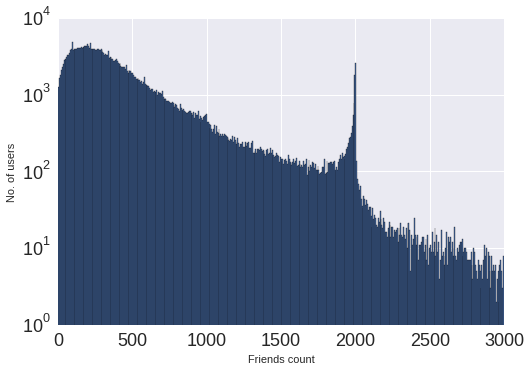

In [56]:
hist_obj=plt.hist(x=normal_users.friends_count,
           bins=500)
plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Friends count")
plt.ylabel("No. of users")
ax = plt.subplot() # Defines ax variable by creating an empty plot

    
plt.savefig("../app/static/friends_all.png", dpi=300, transparent=True)

plt.figure(2)
churned = normal_users[normal_users['churn']==True]['friends_count'] + 1
print churned.describe()
churned.hist(bins=500)
plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Friends count")
plt.ylabel("No. of users")
plt.rcParams.update({'font.size': 22})
plt.savefig("../app/static/friends_churned.png", dpi=300, transparent=True)

plt.figure(3)
notchurned = normal_users[normal_users['churn']==False]['friends_count'] + 1
print notchurned.describe()
notchurned.hist(bins=500)
plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Friends count")
plt.ylabel("No. of users")
plt.rcParams.update({'font.size': 22})
plt.savefig("../app/static/friends_retained.png", dpi=300, transparent=True)

count    20396.000000
mean       277.780447
std        354.752353
min          1.000000
25%         52.000000
50%        164.000000
75%        359.000000
max       2981.000000
Name: followers_count, dtype: float64
count    366411.000000
mean        449.855062
std         479.914376
min           1.000000
25%         139.000000
50%         298.000000
75%         571.000000
max        3000.000000
Name: followers_count, dtype: float64


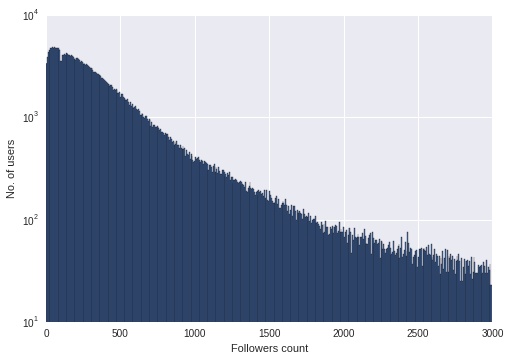

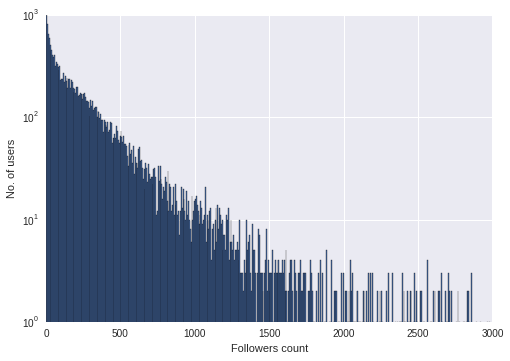

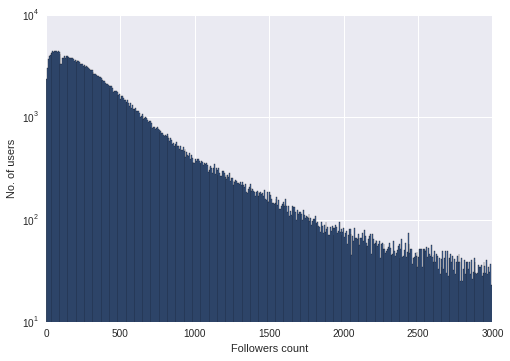

In [50]:
hist_obj=plt.hist(x=normal_users.followers_count,
           bins=500)
plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Followers count")
plt.ylabel("No. of users")
plt.rcParams.update({'font.size': 22})
plt.savefig("../app/static/followers_all.png", dpi=300, transparent=True)


plt.figure(2)
churned = normal_users[normal_users['churn']==True]['followers_count'] + 1
print churned.describe()
churned.hist(bins=500)
plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Followers count")
plt.ylabel("No. of users")
plt.rcParams.update({'font.size': 22})
plt.savefig("../app/static/followers_churned.png", dpi=300, transparent=True)

plt.figure(3)
notchurned = normal_users[normal_users['churn']==False]['followers_count'] + 1
print notchurned.describe()
notchurned.hist(bins=500)
plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Followers count")
plt.ylabel("No. of users")
plt.rcParams.update({'font.size': 22})
plt.savefig("../app/static/followers_retained.png", dpi=300, transparent=True)

In [91]:
normal_users.user_age.filter(normal_users.user_age > -0.5)

True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
...
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
True    53161400000000000
Name: user_age, Length: 388879, dtype: int64

In [125]:
print normal_users.head(1).created_at.dtype

datetime64[ns]


count    20341.000000
mean        37.393345
std         22.825413
min          0.166667
25%         17.066667
50%         36.566667
75%         53.100000
max        107.100000
Name: created_at, dtype: float64
count    366378.000000
mean         47.341758
std          22.616344
min           0.000000
25%          30.400000
50%          46.800000
75%          68.300000
max         109.000000
Name: created_at, dtype: float64


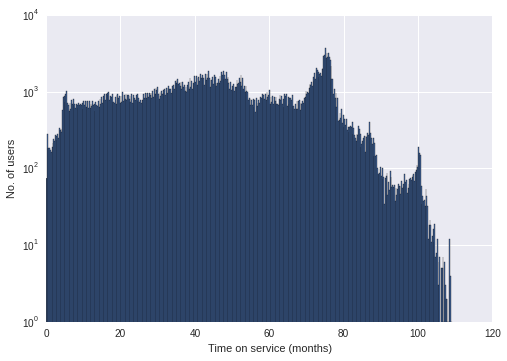

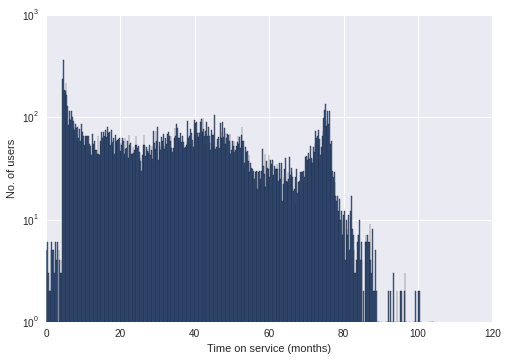

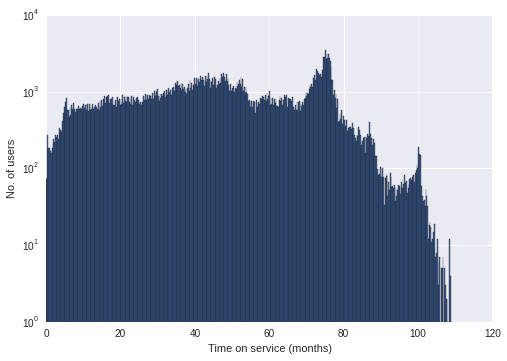

In [52]:
user_age = normal_users[normal_users.created_at > np.datetime64('2002')].created_at.map(lambda x: (query_date - x).days/30.)

hist_obj=plt.hist(x=user_age,
           bins=500)
#plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Time on service (months)")
plt.ylabel("No. of users")
plt.rcParams.update({'font.size': 22})
plt.savefig("../app/static/time_on_service_all.png", dpi=300, transparent=True)

plt.figure(2)
churned = user_age[normal_users['churn']==True]
print churned.describe()
churned.hist(bins=500)
#plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Time on service (months)")
plt.ylabel("No. of users")
plt.rcParams.update({'font.size': 22})
plt.savefig("../app/static/time_on_service_churned.png", dpi=300, transparent=True)

plt.figure(3)
notchurned = user_age[normal_users['churn']==False]
print notchurned.describe()
notchurned.hist(bins=500)
#plt.xlim([0, 3000])
plt.gca().set_yscale('log')
plt.xlabel("Time on service (months)")
plt.ylabel("No. of users")
plt.rcParams.update({'font.size': 22})
plt.savefig("../app/static/time_on_service_retained.png", dpi=300, transparent=True)

In [ ]:
plt.hexbin(x=user_age)